In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time
import logging

logging.getLogger("prophet").setLevel(logging.ERROR)
logging.getLogger("cmdstanpy").disabled = True

from time_series_gpt.models.Monte_Carlo.prophet import ProphetMeta
from data_loading_finance.loading_data import LoadingData
from ts_tools.tools import tools

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


Getting info for 8 tickers...
Too many unique ids to plot: 8. We will plot the first 5.


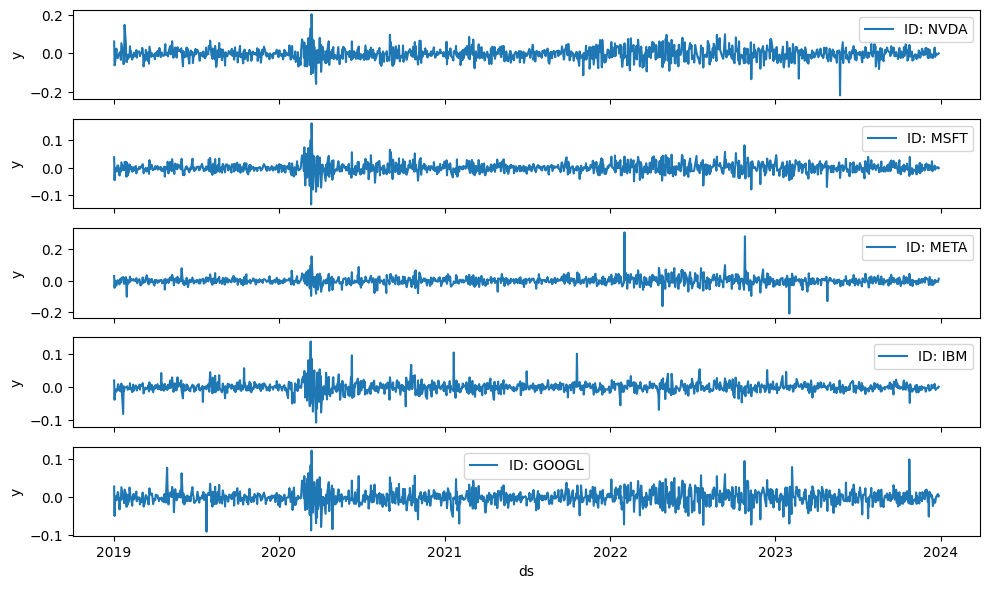

In [16]:
# Load the data
tickers = ['AAPL', 'MSFT', 'GOOGL', 'AMZN', 'NVDA', 'META', 'IBM', 'BTC-USD']
loader = LoadingData(tickers=tickers)
ts = loader.get_data(start_date='2019-01-01', end_date='2023-12-31')
info = loader.get_info_ticker()

ts_tools = tools()
ts = ts_tools.ts_prepartion(ts, 'Date', 'Adj Close')

# Calcular los retornos
ts['y'] = np.log(ts['y'].div(ts.groupby('unique_id')['y'].shift(1)))
Y_df = ts.dropna(subset=['y']).reset_index(drop=True)
ts_tools.plot_ts(Y_df)

In [17]:
prophet = False

horizon= 30
freq= 'D'

model = ProphetMeta (ts_data=Y_df)
model.train_and_evaluate()
ts_forecast = model.predict(horizon=horizon, freq=freq)
result_metric = model.get_results()

Processing NVDA...


In [ ]:
ts_forecast

,unique_id,ds,yhat,yhat_lower,yhat_upper
0,NVDA,2018-01-02,5.562934,4.681676,6.427949
1,NVDA,2018-01-03,5.578685,4.724205,6.446568
2,NVDA,2018-01-04,5.615643,4.783513,6.377796
3,NVDA,2018-01-05,5.618618,4.800300,6.434618
4,NVDA,2018-01-08,5.560671,4.730821,6.396371
...,...,...,...,...,...
1033,AAPL,2022-01-26,188.194785,184.013896,192.901165
1034,AAPL,2022-01-27,188.451679,184.161493,193.383579
1035,AAPL,2022-01-28,188.656247,184.317944,193.477926
1036,AAPL,2022-01-29,189.071051,184.515122,194.235365


In [ ]:
result_metric

,unique_id,SMAPE Error,MAPE Error,Accuracy
0,NVDA,0.407774,0.353512,59.222633
0,MSFT,0.068247,0.068972,93.175322
0,META,0.170370,0.164902,82.963047
0,IBM,0.144966,0.138850,85.503437
0,GOOGL,0.110673,0.110578,88.932739
0,BTC-USD,0.691101,0.536528,30.889924
0,AMZN,0.141246,0.141053,85.875423
0,AAPL,0.235454,0.221003,76.454562


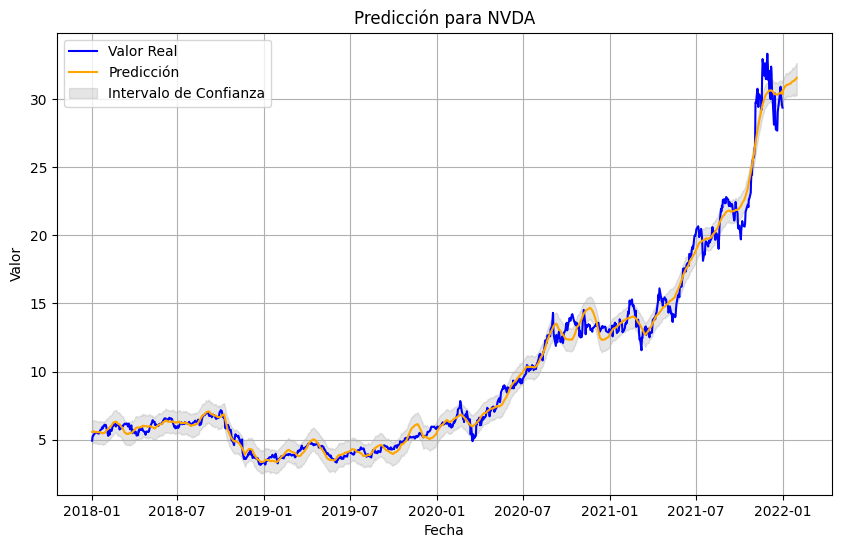

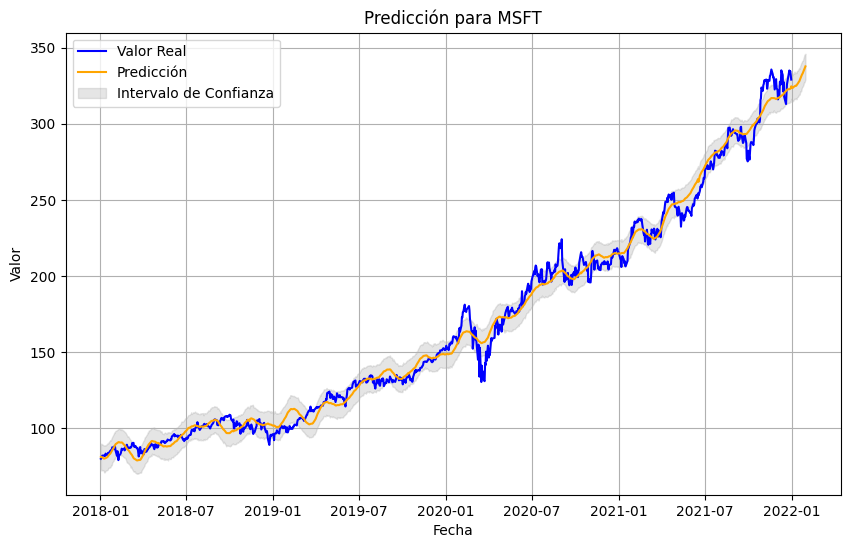

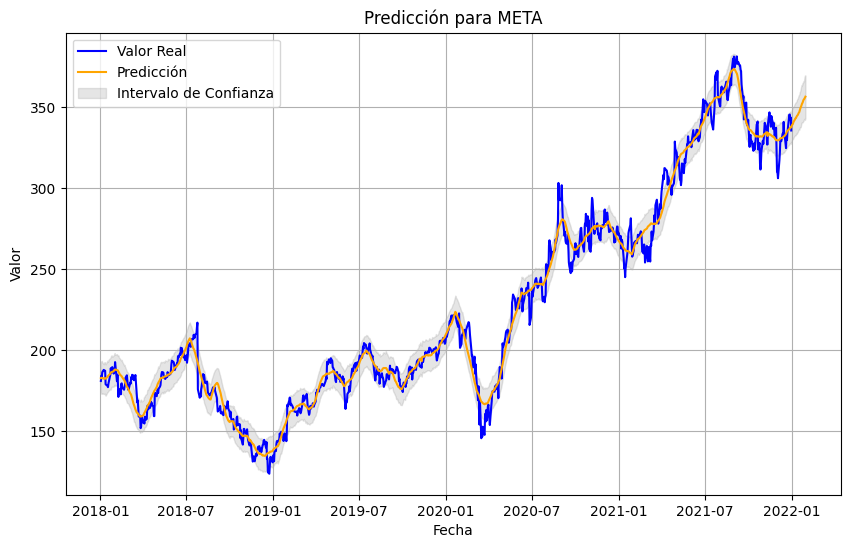

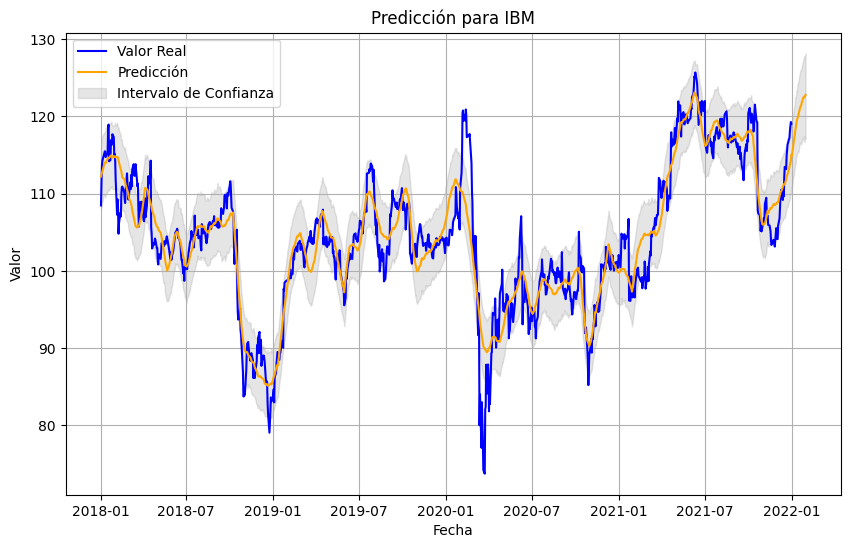

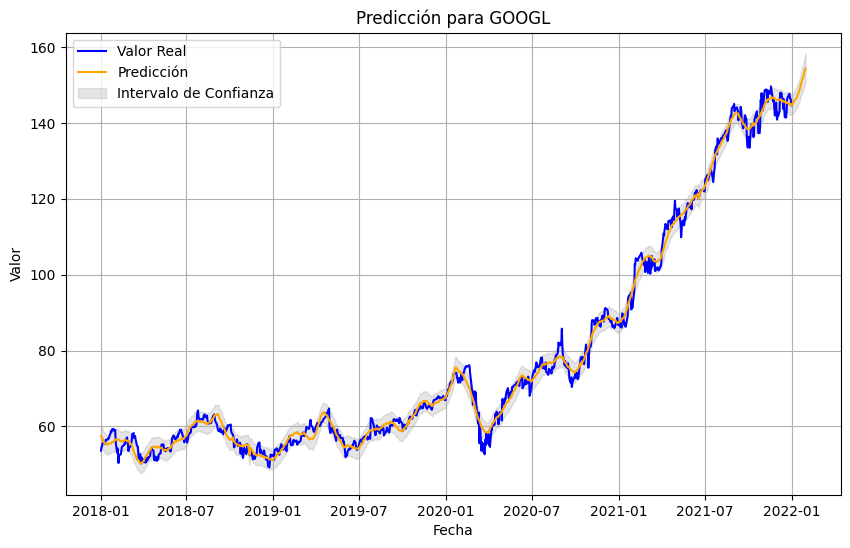

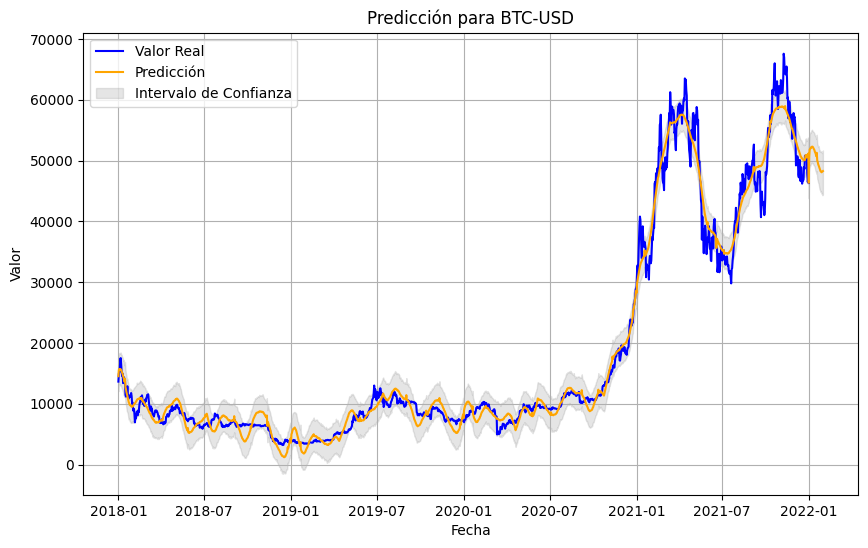

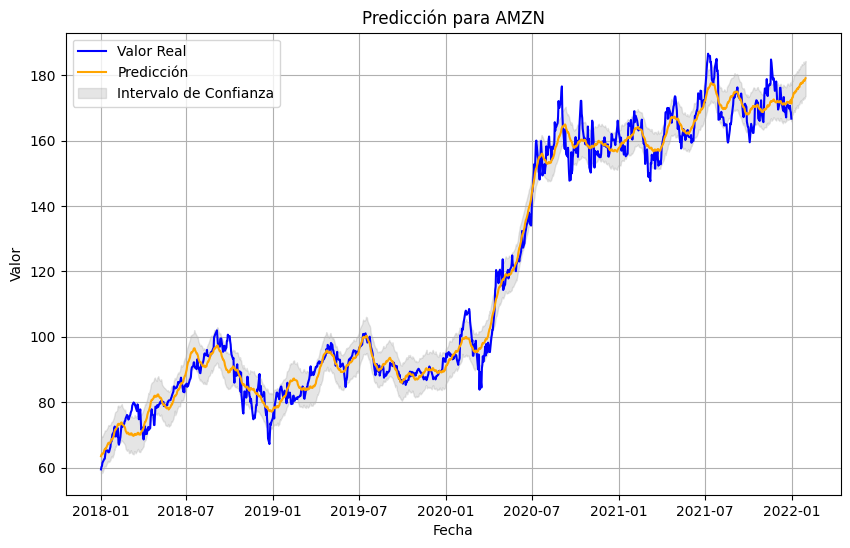

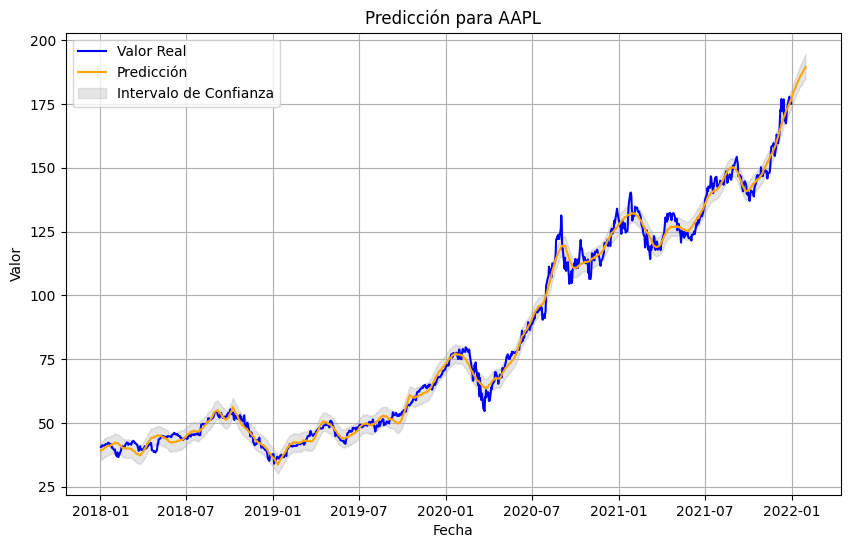

In [ ]:
# Función para graficar el pronóstico junto con los valores reales
def plot_forecast(ts_data, ts_forecast):
    unique_ids = ts_forecast['unique_id'].unique()
    
    for unique_id in unique_ids:
        forecast_data = ts_forecast[ts_forecast['unique_id'] == unique_id]
        actual_data = ts_data[ts_data['unique_id'] == unique_id]
        
        plt.figure(figsize=(10, 6))
        
        # Graficar los valores reales
        plt.plot(actual_data['ds'], actual_data['y'], label='Valor Real', color='blue')
        
        # Graficar las predicciones
        plt.plot(forecast_data['ds'], forecast_data['yhat'], label='Predicción', color='orange')
        
        # Rellenar el intervalo de confianza
        plt.fill_between(forecast_data['ds'], forecast_data['yhat_lower'], forecast_data['yhat_upper'], 
                         color='gray', alpha=0.2, label='Intervalo de Confianza')
        
        plt.title(f'Predicción para {unique_id}')
        plt.xlabel('Fecha')
        plt.ylabel('Valor')
        plt.legend()
        plt.grid(True)
        plt.show()
        
plot_forecast(ts, ts_forecast)